Start med å importere de kommandoene som trengs fra nbtext

In [45]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [38]:
from module_update import update, css
update('nbtext', overwrite=True)
import nbtext as nb
from nbtext import cloud, get_urn, Cluster, Corpus, get_konk
%matplotlib inline

Updated file `/home/lars/nbtext.py`

In [13]:
import graph_networkx_louvain as gnl

In [2]:
from random import sample

In [39]:
css()

### Lager liste over URNer

In [40]:
# alle bøker med ordet 'penger' i seg fra romaner (dewey 839)

penger = get_urn({'words':['penger'], 'year': 2000, 'next':10, 'ddk':"839%", 'limit':20000})

In [41]:
len(penger)

8438

In [3]:
# alle bøker med ordet 'formue' i seg
formue = get_urn({'words':['formue'], 'year': 2000, 'next':10, 'ddk':"839%", 'limit':20000})

In [4]:
# prøver å knytte arv til formue - men ser ut til å domineres av arv og miljø uansett - altså en genetisk dimensjon

formue_arv = nb.refine_urn([str(x[0]) for x in formue], {'words':'arv', 'limit':len(formue)})

In [42]:
# alle bøker med formue og penger i seg

formue_penger = nb.refine_urn([str(x[0]) for x in formue], {'words':'penger', 'limit':len(formue)})

In [43]:
len(formue_arv)

2530

In [44]:
len(formue_penger)

2577

## Her kan du se konkordanser

viktig a sample() er med for å begrense antall URN-er pr. søk. Det vil uansett være for mange til å konsumere. Bare kjør søket flere ganger for å se.

In [36]:
urns = sample(penger, 20)
nb.get_urnkonk('penger', {'urns':urns, 'before':8, 'after':8})

"Sannhetsstøv, type 1, Mejlænder, Ulf-Arvid, 2008",jeg bare vil . Dessuten fikk jeg masse,penger,for å love aldri å bruke den mislykkede
"Sannhetsstøv, type 1, Mejlænder, Ulf-Arvid, 2008",Isteden hadde han jobbet hardt og tjent masse,penger,", og til slutt var han blitt valgt"
"Kilden, Scott, Gabriel, 2009","ingen spøk karaffel , den hadde kostet grovelig",penger,", om en først skulle snakke om det"
"Kilden, Scott, Gabriel, 2009",flust med hår jamt og slapp å koste,penger,"på tråd . Plump , der gikk blysteinen"
"Kilden, Scott, Gabriel, 2009",. Om det er fullt med stein eller,penger,", skapet ser akkurat likedan ut , skapet"
"Kilden, Scott, Gabriel, 2009",", at her stod en ask full av",penger,til høyre ? Og nu den blå karaflen
"Kilden, Scott, Gabriel, 2009","garntråden der , han har tjent så grovelig",penger,at han akter å skaffe seg not -
"40, Berggren, Arne, 2001","Kox pensjonat , er det for å spare",penger,", det er vel faen meg kakkerlakker som"
"40, Berggren, Arne, 2001",HUSTRU Det har med,penger,"å gjøre , du klager jo over at"
"40, Berggren, Arne, 2001",Det handler om,penger,", naturligvis ."
"Gylne dager, Eriksen, Synnøve, 2002","isbaren i sentrum , enda hun tjente mindre",penger,på å selge is enn å vaske hotellrom


## Her er noen kollokasjonsøvelser. 

Det blir noen tema ut av det, som er greie å tolke. Se på resultatene av `gnl.show_community()`

In [9]:
formuekorpus = Corpus(target_urns=[str(x[0]) for x in formue], reference_urns=[])

In [10]:
formue_arvkorpus = Corpus(target_urns=[str(x[0]) for x in formue_arv], reference_urns=[])

In [11]:
formue_arvkorpus.make_collocation_graph('arv', exp=1.1)

In [19]:
formuekorpus.make_collocation_graph('formue', exp = 1.5)

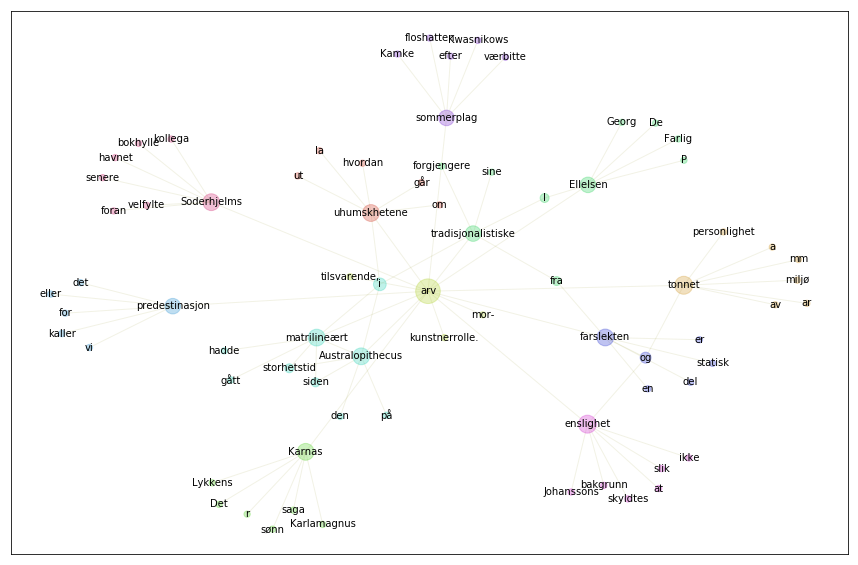

In [14]:
gnl.show_graph((formue_arvkorpus.coll_graph['arv']))

In [37]:
gnl.show_community(formue_arvkorpus.coll_graph['arv'])

1 mor-, kunstnerrolle., arv, tilsvarende,

2 saga, Karnas, sønn, Det, r, Karlamagnus, Lykkens

3 tradisjonalistiske, P, I, fra, forgjengere, Georg, Farlig, De, Ellelsen, sine

4 matrilineært, den, hadde, i, siden, gått, på, Australopithecus, storhetstid

5 det, predestinasjon, vi, for, eller, kaller

6 del, statisk, farslekten, en, er, og

7 sommerplag, efter, værbitte, floshatten, Kwasnikows, Kamke

8 skyldtes, ikke, Johanssons, enslighet, at, bakgrunn, slik

9 Soderhjelms, kollega, foran, bokhylle, senere, havnet, velfylte

10 hvordan, går, ut, uhumskhetene, la, om

11 av, ar, miljø, mm, tonnet, a, personlighet



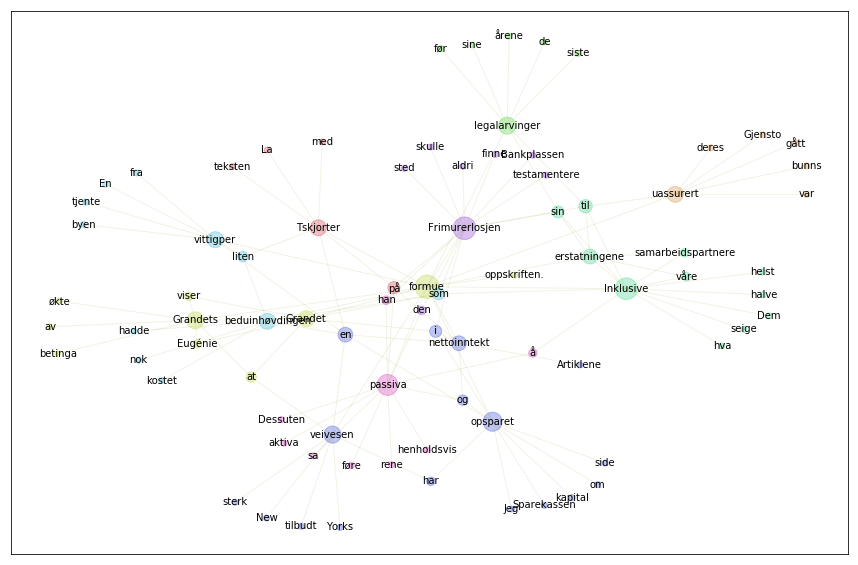

In [18]:
gnl.show_graph((formuekorpus.coll_graph['formue']))

In [32]:
gnl.show_community(formuekorpus.coll_graph['formue'])

1 av, formue, viser, Grandet, at, Eugénie, oppskriften., Grandets, betinga, økte

2 før, legalarvinger, siste, de, årene, sine

3 halve, helst, Dem, Inklusive, sin, til, seige, erstatningene, hva, våre, samarbeidspartnere

4 liten, En, som, fra, vittigper, nok, kostet, tjente, byen, hadde, beduinhøvdingen

5 kapital, side, i, Sparekassen, Jeg, opsparet, om, tilbudt, nettoinntekt, en, Artiklene, veivesen, sterk, har, Yorks, New, og

6 sted, testamentere, den, Bankplassen, Frimurerlosjen, aldri, skulle, finne

7 passiva, rene, sa, Dessuten, å, aktiva, henholdsvis, føre, han

8 teksten, Tskjorter, på, La, med

9 Gjensto, bunns, deres, gått, uassurert, var



In [22]:
formuekorpus.collocations('formue')

True

In [30]:
formuekorpus.sort_collocations('formue', exp=2)[:10]

,0
kulturtiltak,4.731662
legalarvinger,4.556084
Grandet,3.477992
Grandets,3.477992
kostet,3.335602
erstatningene,3.259006
Frimurerlosjen,3.082923
Tskjorter,2.860723
vittigper,2.860723
veivesen,2.746798


In [31]:
formuekorpus.sort_collocations('formue', exp=1)[:10]

,0
kulturtiltak,10125.757009
legalarvinger,9750.019626
Grandets,7442.903271
Grandet,7442.903271
erstatningene,6974.272430
Frimurerlosjen,6597.454257
Tskjorter,6121.947196
vittigper,6121.947196
oppskriften.,5878.148131
veivesen,5878.148131
